In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as ss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [6]:
df = pd.read_csv('F:\\dev_stuff\\DSP_TIME_SERIES\\air+quality\\AirQualityUCI.csv',sep = ';')
co = [float(x.replace(',', '.')) for x in df["CO(GT)"].to_list()]

print(df.info)

<bound method DataFrame.info of             Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0     10/03/2004  18.00.00    2,6         1360       150     11,9   
1     10/03/2004  19.00.00      2         1292       112      9,4   
2     10/03/2004  20.00.00    2,2         1402        88      9,0   
3     10/03/2004  21.00.00    2,2         1376        80      9,2   
4     10/03/2004  22.00.00    1,6         1272        51      6,5   
...          ...       ...    ...          ...       ...      ...   
9352  04/04/2005  10.00.00    3,1         1314      -200     13,5   
9353  04/04/2005  11.00.00    2,4         1163      -200     11,4   
9354  04/04/2005  12.00.00    2,4         1142      -200     12,4   
9355  04/04/2005  13.00.00    2,1         1003      -200      9,5   
9356  04/04/2005  14.00.00    2,2         1071      -200     11,9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0              1046      166          1056      113          1692   
1

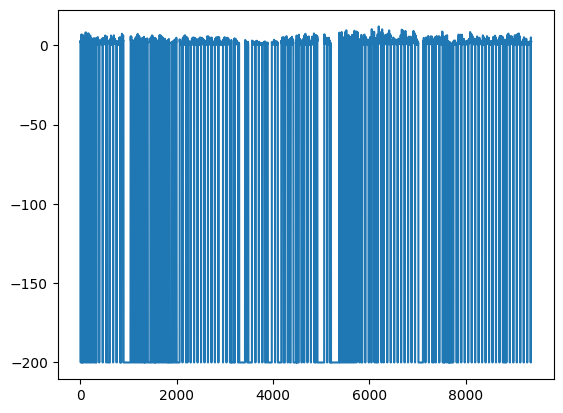

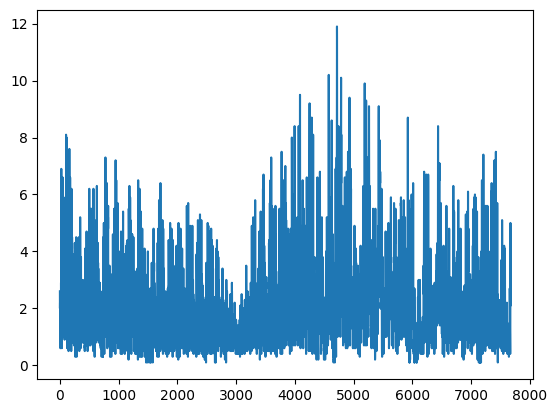

In [7]:

plt.plot(co)
plt.show()
avg = [i for i in co if i != -200]
co_rem = [i if i != -200 else np.mean(avg) for i in avg]
plt.plot(co_rem)


In [8]:
adf = adfuller(co_rem)
print(adf[0])
print(adf[1])

-9.556031147206337
2.497591755460412e-16


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


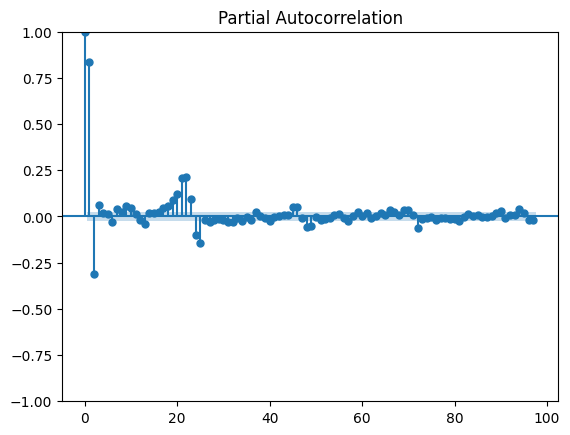

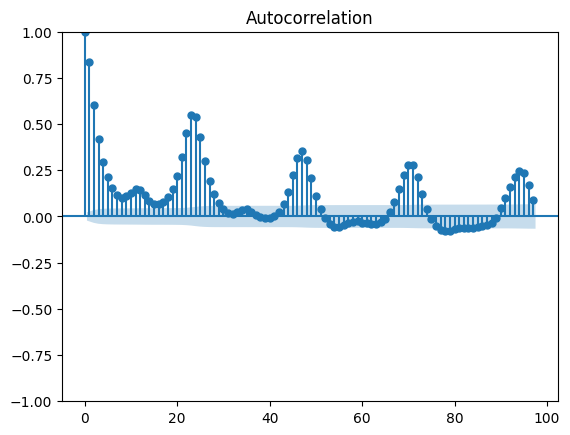

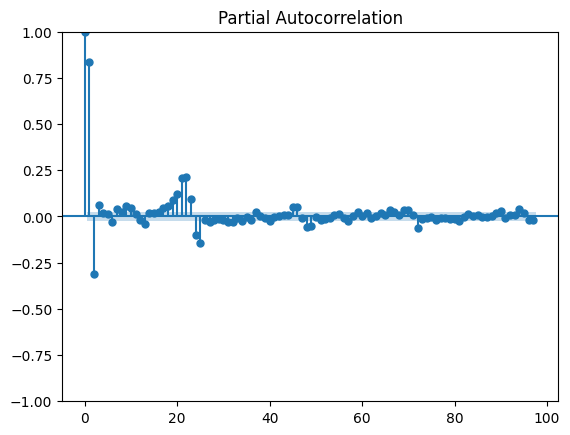

In [9]:
plot_acf(np.array(co_rem), lags = 97)
plot_pacf(np.array(co_rem), lags = 97)

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 7674
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood               -8677.175
Date:                            Thu, 23 Jan 2025   AIC                          17364.351
Time:                                    14:23:24   BIC                          17399.062
Sample:                                         0   HQIC                         17376.259
                                           - 7674                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7961      0.006    124.540      0.000       0.784       0.809
ma.L1          0.2624      0.010   

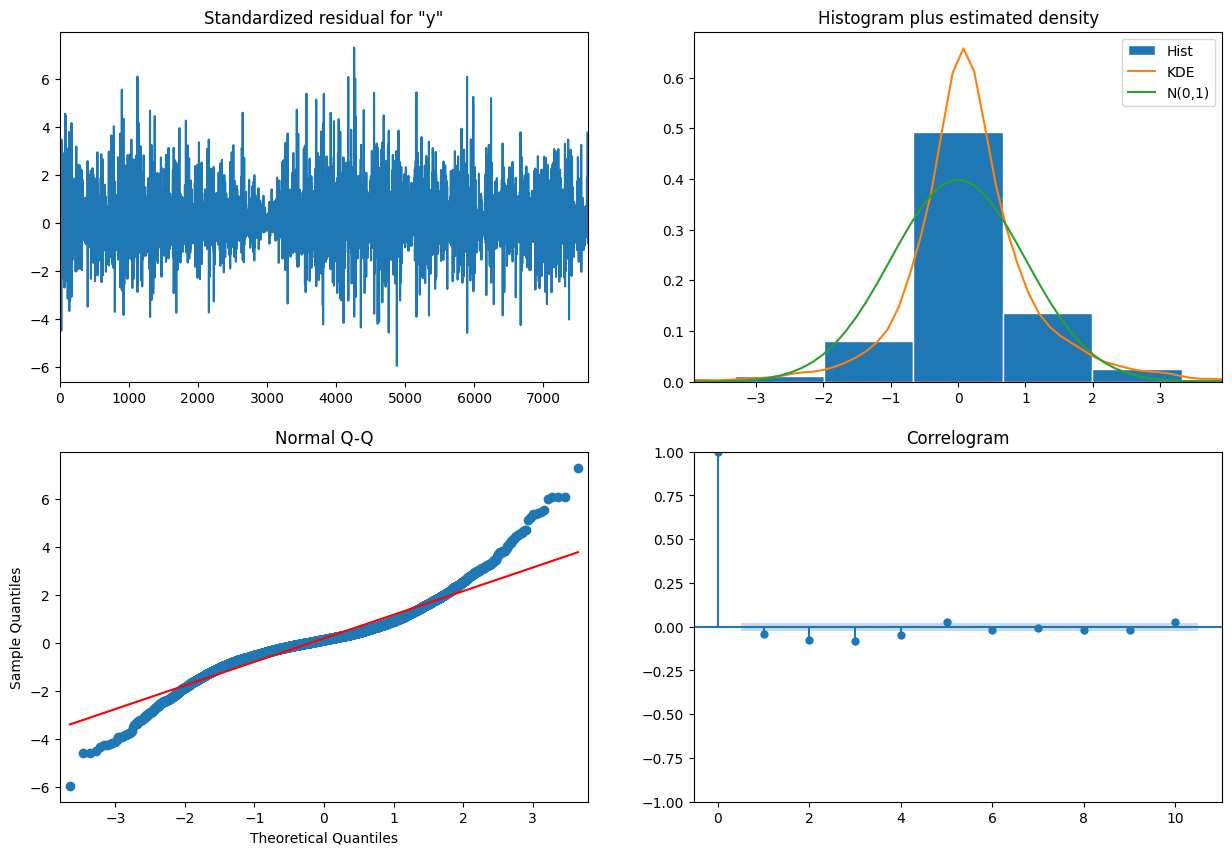

In [10]:
model = SARIMAX(co_rem, 
                order=(1, 0, 1), 
                seasonal_order=(1, 0, 1, 24), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()
print(results.summary())
results.plot_diagnostics(figsize=(15, 10))
plt.show()


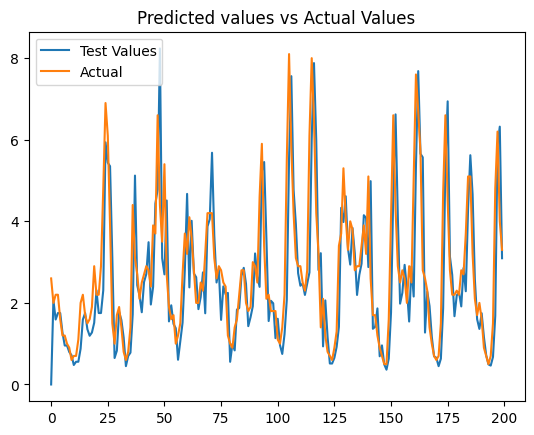

In [11]:
plt.plot(results.fittedvalues[:200], label = 'Test Values')
plt.plot(co_rem[:200], label = 'Actual')
plt.title("Predicted values vs Actual Values")
plt.legend()
plt.show()

In [12]:
def plot_actual_vs_forecast(actual, forecast, title="Actual vs Forecast", xlabel="Time", ylabel="Value"):
    plt.figure(figsize=(10, 6))
    
    # Plot actual data with a solid line
    plt.plot(actual, label='Actual', linestyle='-', linewidth=2, color='blue')
    
    # Plot forecast data with a dashed line
    plt.plot(list(range(len(actual), len(actual) + len(forecast))), forecast, label='Forecast', linestyle='--', linewidth=2, color='orange')
    
    # Add labels, title, and legend
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(fontsize=12)
    
    # Show grid
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Display the plot
    plt.show()

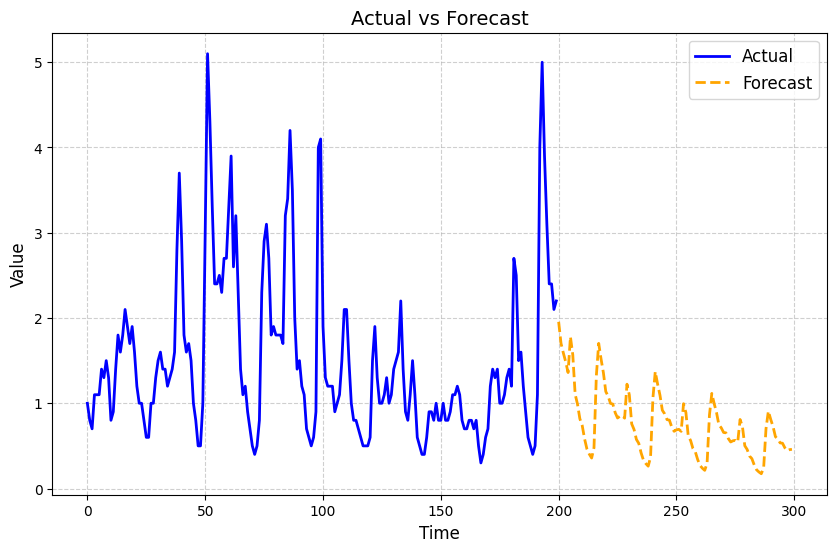

In [13]:
plot_actual_vs_forecast(co_rem[-200:], forecast = results.get_forecast(steps=100).predicted_mean)